# HARSHBIR SINGH
# 101903604
# 4COE23
# Road Section Prediction

# Importing Dependences

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Reading Dataset

In [129]:
df = pd.read_excel('DATASET.xlsx')
df.head(3)

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68


# Preprocessing

1)Giving same section number to all the rows in a section 

In [130]:
j = 0
for i in range(100):
    df.iloc[j:j + 10, 0] = df.iloc[j, 0]
    j += 10

In [76]:
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [131]:
df.columns = df.columns.str.replace('Unnamed: 0', 'Section')

In [132]:
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])

In [133]:
df.isna().sum()

Section    89
year        0
Para-1      0
Para-2      0
Para-3      0
Para-4      0
Para-5      0
Para-6      0
Para-7      0
Para-8      0
Para-9      0
Para-10     0
Para-11     0
Para-12     0
Para-13     2
dtype: int64

#As null values in para-13 are very less we fill the value by 0 and not by interpolation 

In [134]:
df=df.fillna(0)

In [135]:
df.isna().sum()

Section    0
year       0
Para-1     0
Para-2     0
Para-3     0
Para-4     0
Para-5     0
Para-6     0
Para-7     0
Para-8     0
Para-9     0
Para-10    0
Para-11    0
Para-12    0
Para-13    0
dtype: int64

In [120]:
#df=df.drop(df.index[df['Section'] == 0])

In [136]:
#df

# Test set

In [137]:
test=df.loc[df['year']==10]
test

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,0,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,0,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,0,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


# Model

In [189]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [ ]:
model = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=35,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    random_state=29)

In [ ]:
def sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [ ]:
rmse = []
n = 0
idx = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  count = 0
  for row in range(0, 1000, 10):
    xtrain = df.iloc[row:row+9, 1:10]
    ytrain = df.iloc[row:row+9, col]
    xtest = df.iloc[row+9, 1:10].to_numpy()
    ytest = df.iloc[row+9, col]
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest.reshape(1,-1))[0]
    predicted[headers[idx]].append(ypred)
    res += (ytest - ypred)**2
    count += 1
    n += 1
  rmse.append(res)
  idx += 1

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

In [139]:
etr = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

In [140]:
header_pred = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [141]:
pred = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [142]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 99)

# Implementation

In [143]:
def selectedModel(val):
    RMSE = []
    N = 0
    index = 0
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]

                #Applying Random Forest 
                etr.fit(xtrain, ytrain)

                #Predicting Values
                ypred = etr.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                pred[header_pred[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    #For Applying Random Forest    
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = df.iloc[i:i+9, 1:10]
                ytrain = df.iloc[i:i+9, j]
                xtest = df.iloc[i+9, 1:10].to_numpy()
                ytest = df.iloc[i+9, j]

                #Applying Random Forest 
                rf.fit(xtrain, ytrain)

                #Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                pred[header_pred[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [144]:
#Applying Random Forest
pred_RMSE, pred_count = selectedModel(1)

In [145]:
df_pred = pd.DataFrame.from_dict(pred)
df_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.4163,53.0578,35.454,7.553,1.892680
1,56.0506,27.8172,0.883,7.580,0.787786
2,61.9611,0.0000,0.000,10.954,1.363368
3,15.8061,52.3800,57.198,6.913,1.794911
4,0.0000,247.0107,33.798,5.838,1.675506
...,...,...,...,...,...
95,164.1001,177.6157,8.852,7.277,1.504185
96,3.9780,56.6903,21.199,11.663,1.063951
97,97.6053,56.1215,12.136,10.749,0.882383
98,108.6803,219.4896,132.536,10.328,2.016469


# RMSE 

In [220]:
#RMSE for each column
k=[]
for i in pred_RMSE:
    k.append((i/pred_count)**0.5)
k=np.array(k)
k

array([72.79876891, 68.89693551, 28.50235272, 15.16723372,  0.25806849])

In [221]:
pred_RMSE

[529966.0755283373,
 474678.7722681111,
 81238.41107569,
 23004.497885,
 6.659934371065797]

In [222]:
#Total RMSE
print('Total RMSE: ',(sum(pred_RMSE)/500)**0.5)

Total RMSE:  47.09340541289214


# Plots

In [204]:
#Selecting random 40 rows
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

In [205]:
# Get random rows for plotting
plot_row = 40

random_rows = []
for i in range(plot_row):
  random_rows.append(random.randint(0,90))

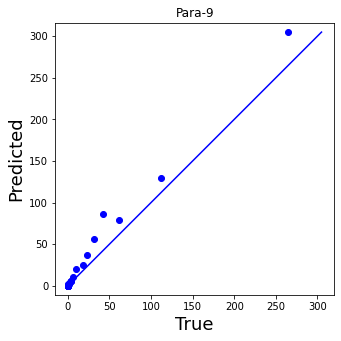

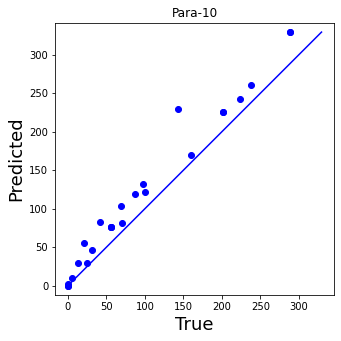

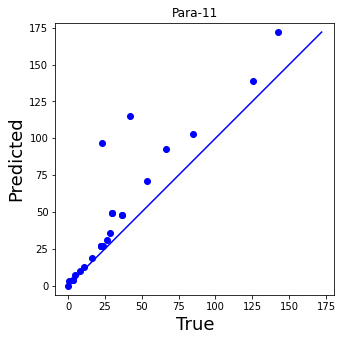

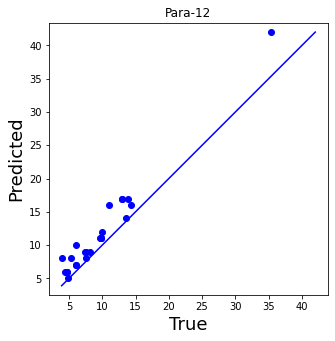

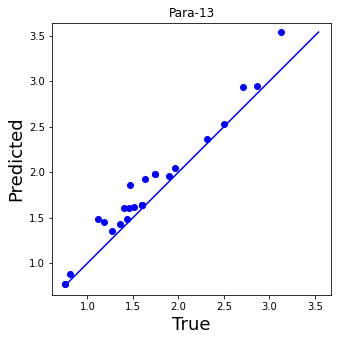

In [188]:
for i in range(5):
  plt.figure(figsize=(5, 5))
  true_value = df_pred.iloc[generator, i]
  predicted_value = test.iloc[generator, i + 10]
  plt.scatter(true_value, predicted_value, c='blue')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.axis('equal')
  plt.show()